<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/Simple_linear_regression_with_single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression with ANN with single neuron
https://www.tensorflow.org/tutorials/keras/regression#linear_regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataset_x = np.linspace(-1, 1, 101)
print(f'dataset_x.shape = {dataset_x.shape}')

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
dataset_y = 2 * dataset_x + np.random.randn(*dataset_x.shape) * 0.33

dataset_x.shape = (101,)


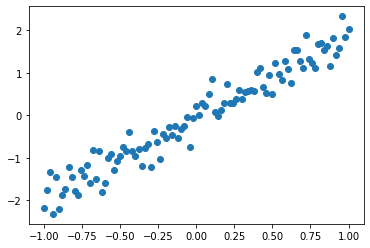

In [3]:
plt.scatter(dataset_x, dataset_y)
plt.show()

In [4]:
dataset = list(zip(dataset_x, dataset_y))
print(f'dataset = {dataset}') # list of (x, y) tuples

# Pandas dataframe
df_dataset =  pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, -2.1850065337153106), (-0.98, -1.757467016315215), (-0.96, -1.3361871790830113), (-0.94, -2.32403694941938), (-0.92, -1.4535280606057952), (-0.9, -2.216795839411052), (-0.88, -1.8789278770964228), (-0.86, -1.7266689888753404), (-0.84, -1.2304162527591678), (-0.8200000000000001, -1.4660878465162626), (-0.8, -1.776398092549251), (-0.78, -1.8757916497103264), (-0.76, -1.2959064676931198), (-0.74, -1.4318011031033444), (-0.72, -1.1769463215788998), (-0.7, -1.5882567620698376), (-0.6799999999999999, -0.821532660670992), (-0.6599999999999999, -1.4994438495037352), (-0.64, -0.8523727374535681), (-0.62, -1.8141115229560523), (-0.6, -1.5866574954433568), (-0.5800000000000001, -1.0164132171541926), (-0.56, -0.9144156099890031), (-0.54, -1.2945530188277972), (-0.52, -1.0718310234469546), (-0.5, -0.9560383412172752), (-0.48, -0.7533945938073796), (-0.45999999999999996, -0.8526765651844417), (-0.43999999999999995, -0.39209438069532393), (-0.42000000000000004, -0.8336298481490627),

In [5]:
train_features = dataset_train.copy()
test_features = dataset_test.copy()

train_labels = train_features.pop('y')
test_labels = test_features.pop('y')

x = np.array(train_features['x'])

In [6]:
# model with a single neuron
model = tf.keras.Sequential([
    layers.Dense(input_shape=[1,], units=1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.predict(x[:10])

array([[-0.78007853],
       [ 1.1701179 ],
       [-1.5601571 ],
       [ 0.16251637],
       [ 0.81258184],
       [ 1.4301441 ],
       [-1.1051114 ],
       [ 0.7475753 ],
       [ 0.1300131 ],
       [ 1.4951506 ]], dtype=float32)

In [19]:
learning_rate = 0.1
# optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
    loss='mean_absolute_error')

In [20]:
%%time
history = model.fit(
    train_features['x'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 6 s, sys: 117 ms, total: 6.11 s
Wall time: 6.03 s


In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.234794,0.193991,95
96,0.233469,0.193163,96
97,0.232986,0.192960,97
98,0.233102,0.192254,98
99,0.234465,0.193303,99


In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

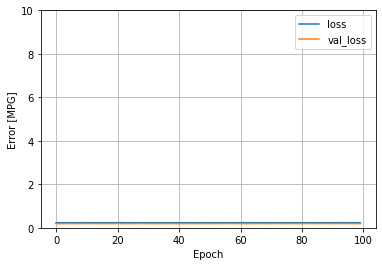

In [23]:
plot_loss(history)

In [24]:
x = np.linspace(-1, 1, 101)
y = model.predict(x)

In [25]:
def plot_fn(x, y):
  plt.scatter(train_features['x'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

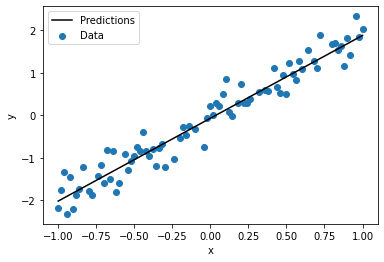

In [26]:
plot_fn(x,y)